In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.preprocessing import OrdinalEncoder


In [30]:
train=pd.read_csv("./train.csv")
test=pd.read_csv('./test.csv')

In [537]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,5,65.0,8450,1,2,0,0,0,...,0,4,4,5,0,0,2,0,0,208500
1,2,20,5,80.0,9600,1,2,0,0,0,...,0,4,4,5,0,1,1,0,0,181500
2,3,60,5,68.0,11250,1,2,1,0,0,...,0,4,4,5,0,3,2,0,0,223500
3,4,70,5,60.0,9550,1,2,1,0,0,...,0,4,4,5,0,0,0,0,1,140000
4,5,60,5,84.0,14260,1,2,1,0,0,...,0,4,4,5,0,0,2,0,0,250000


In [6]:
xtest=test[test.columns[1:]]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

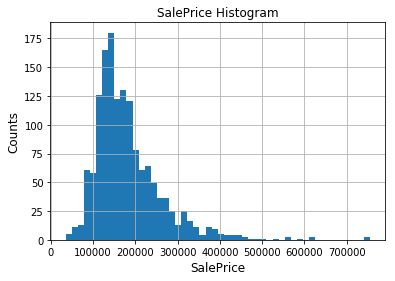

In [31]:
ytrain=train['SalePrice']
train.shape, test.shape

#Salesprice is skewed to the right
ytrain.hist(bins=50)
plt.xlabel('SalePrice',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.title('SalePrice Histogram')
ytrain.describe()

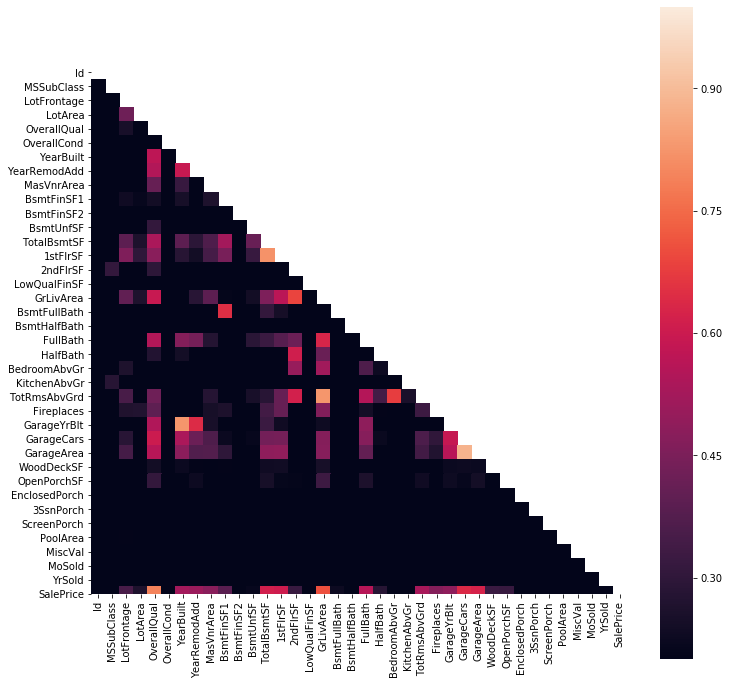

In [4]:
f, ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(),vmin=.2,square=True,mask=mask);


In [5]:
#top correlated variables

s=train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()
corr=pd.DataFrame(s)
corr=corr.rename(columns={0: 'abs(r)'})
corr[corr['abs(r)']>0.5]

,,abs(r)
SalePrice,SalePrice,1.000000
GarageCars,GarageArea,0.882475
GarageYrBlt,YearBuilt,0.825667
GrLivArea,TotRmsAbvGrd,0.825489
1stFlrSF,TotalBsmtSF,0.819530
OverallQual,SalePrice,0.790982
GrLivArea,SalePrice,0.708624
2ndFlrSF,GrLivArea,0.687501
BedroomAbvGr,TotRmsAbvGrd,0.676620
BsmtFullBath,BsmtFinSF1,0.649212


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


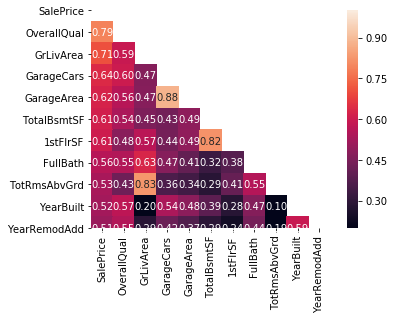

In [18]:
#top correlated variables with respect to salesprice
corrdf=train.corr()
topscorr=pd.DataFrame(corrdf[corrdf['SalePrice']>0.50]['SalePrice'].abs().sort_values(ascending=False))
mask = np.zeros_like(train[topscorr.index].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[topscorr.index].corr(),square=True,annot=True, mask=mask, fmt='.2f',annot_kws={'size': 10},vmin=.2)
topscorr

In [19]:
#About the highest R value OverallQual
# this is an ordinal categorical variable represented by integers
np.sort(train.OverallQual.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

Text(0.5, 1.0, 'Boxplots of Overall Qual')

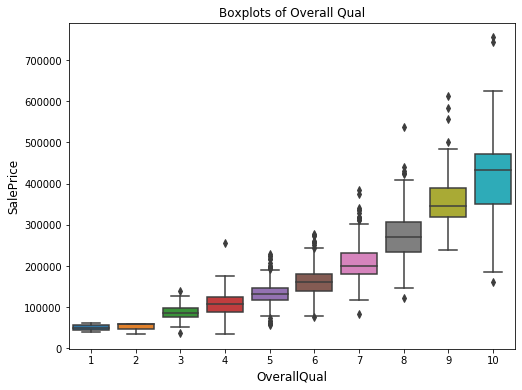

In [20]:
#Boxplots to show trends of Saleprice vs Overall Qual
bplot_data=train[['SalePrice', 'OverallQual']]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=bplot_data)
plt.xlabel('OverallQual',fontsize=12)
plt.ylabel('SalePrice',fontsize=12)
plt.title('Boxplots of Overall Qual')

In [21]:
#Continuous variable
train.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

Text(0, 0.5, 'SalePrice')

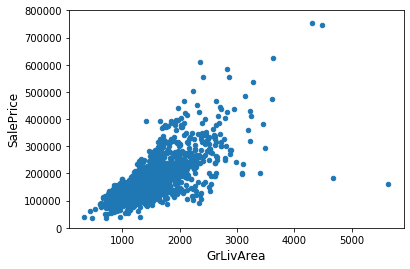

In [22]:
#There are two outliers GrLvArea>4000, but generally there is a linear relationship
GrLiv_data=train[['SalePrice', 'GrLivArea']]
GrLiv_data.plot.scatter(x='GrLivArea', y='SalePrice',ylim=(0,800000));
plt.xlabel('GrLivArea',fontsize=12)
plt.ylabel('SalePrice',fontsize=12)

In [23]:
#Possible candidates for outliers
train[(GrLiv_data['GrLivArea']>4000) & (GrLiv_data['SalePrice']<200000) ][['GrLivArea','OverallQual','SalePrice']]

,GrLivArea,OverallQual,SalePrice
523,4676,10,184750
1298,5642,10,160000


## What to do with missing values
(A) Impute missing values with the total data set (test and train)

(B) Impute missing values with train set and use train set values on train/test set

Since each data set is drawn from the same population (assumption of learning)
The statistics describing each sample data should be similiar
and so to prevent "poisoning" the analysis with test data I choose (B)

NOTE: there are some missing values in test not found in train

In [24]:
misval=pd.DataFrame()
misval['misval_test']=xtest.isnull().sum()
misval['misval_test_%']=round(100*pd.DataFrame(xtest.isnull().sum())/(1459),1)

misval['misval_train']=pd.DataFrame(train.isnull().sum())
misval['misval_train_%']=round(100*pd.DataFrame(train.isnull().sum())/(1460),1)

misval['total_misval']=misval['misval_test']+misval['misval_train']
misval['total_misval_%']=round((100*misval['total_misval'])/(1460+1459),1)
misval=misval[misval['total_misval']>0].sort_values(by='total_misval_%',ascending=False)

In [25]:
print(misval.shape[0]," total missing values" )
print((misval['misval_train']!=0).sum(), "missing values in training set")
print((misval['misval_test']!=0).sum(), "missing values in test set")
misval

34  total missing values
19 missing values in training set
33 missing values in test set


,misval_test,misval_test_%,misval_train,misval_train_%,total_misval,total_misval_%
PoolQC,1456,99.8,1453,99.5,2909,99.7
MiscFeature,1408,96.5,1406,96.3,2814,96.4
Alley,1352,92.7,1369,93.8,2721,93.2
Fence,1169,80.1,1179,80.8,2348,80.4
FireplaceQu,730,50.0,690,47.3,1420,48.6
LotFrontage,227,15.6,259,17.7,486,16.6
GarageFinish,78,5.3,81,5.5,159,5.4
GarageType,76,5.2,81,5.5,157,5.4
GarageQual,78,5.3,81,5.5,159,5.4
GarageCond,78,5.3,81,5.5,159,5.4


## Missing Values Part 1: Filling in NA that are not actually missing values but a description of data

NA can be a descriptor of the data and not a missing value. For example NA for PoolQC describes No Pool

There are 14 categories that match this description. 5 of which are basement qualities and 4 of which are garage qualities. I will handle all the non basement and garage qualities first.

In [26]:
!grep -B8 NA data_description.txt
#14 with NA in description 5 basement qual 4 garage qual



       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
--
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
--
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Liv

In [27]:
# impute NA to category NA
cols= ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

train[cols]=train[cols].fillna('NA')
xtest[cols]=xtest[cols].fillna('NA')

train['MiscFeature'].unique(),xtest['MiscFeature'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array(['NA', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object),
 array(['NA', 'Gar2', 'Shed', 'Othr'], dtype=object))

### Additional comments: 
NA's for any of these categories could also still mean missing data. If there is additional data(in this case there is for Fireplace and Pool), validate the assumption that NA= a column descriptor and not missing data. 

In [28]:
#NA and 0's match there are no NAs that are missing values!
print(xtest[(xtest['Fireplaces']==0) & (xtest['FireplaceQu']!='NA')].shape[0],
      train[(train['Fireplaces']==0) & (train['FireplaceQu']!='NA')].shape[0])

0 0


In [29]:
#Three missing values for Poolarea
print(xtest[(xtest['PoolQC']=='NA') & (xtest['PoolArea']>0)].shape[0],
train[(train['PoolQC']=='NA') & (train['PoolArea']>0)].shape[0])

xtest[(xtest['PoolQC']== 'NA') & (xtest['PoolArea']>0)][['OverallQual', 'PoolQC', 'PoolArea']]

3 0


,OverallQual,PoolQC,PoolArea
960,4,NA,368
1043,6,NA,444
1139,3,NA,561


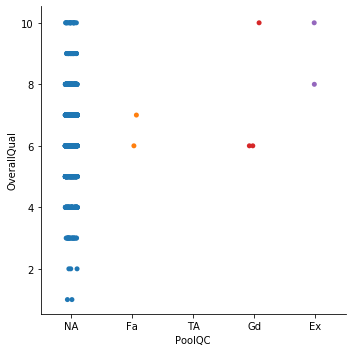

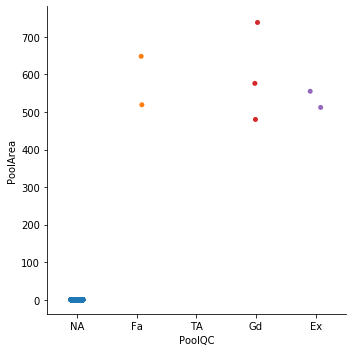

In [30]:
fig = sns.catplot(y='OverallQual', x="PoolQC",order=["NA", "Fa","TA", "Gd","Ex"], data=train)
fig1 = sns.catplot(x='PoolQC', y="PoolArea", order=["NA", "Fa","TA", "Gd","Ex"], data=train)



In [31]:
#slight increase in quality vs pool qc-- give FA for all missing data
xtest['PoolQC']=xtest['PoolQC'].replace({'NA':'Fa'})
print(xtest[(xtest['PoolQC']=='NA') & (xtest['PoolArea']>0)].shape[0],
train[(train['PoolQC']=='NA') & (train['PoolArea']>0)].shape[0])

0 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Missing Values Part 2: Garage qualities

In [32]:
## Training set: 81 entries with no garage 

cols=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
print(train.filter(regex='Garage').isna().sum())
print('total number of entries with misvals is',
      pd.isnull(train[cols].any(axis=1)).sum())

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64
total number of entries with misvals is 0


In [33]:
#Double check to make sure that all entries with no garage have zero values for 
#garagecars and garage area
train[pd.isnull(train['GarageType'])][['GarageCars','GarageArea']].sum()

GarageCars    0
GarageArea    0
dtype: int64

In [34]:
print(xtest.filter(regex='Garage').isna().sum())

#look at all the entries with missing garagetype, check if the other entries are zero or NA)

print(xtest[pd.isnull(xtest['GarageType'])][cols].notna().sum().sum(), 
xtest[pd.isnull(xtest['GarageType'])][['GarageCars','GarageArea']].sum().sum())

#76 entries confirmed with no garage

#This confirms that there may be 2 entries with missval
print(xtest[pd.isnull(xtest['GarageYrBlt'])][cols].notna().sum())
print('The two potential misvals occur at',xtest[pd.isnull(xtest['GarageYrBlt'])]['GarageType'].notna().nonzero()[0])


xtest[pd.isnull(xtest['GarageYrBlt'])].filter(regex='Garage').iloc[[33, 55]]
#xtest.iloc[[666,1116]].fillna('NANA')

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
GarageArea       1
GarageQual      78
GarageCond      78
dtype: int64
0 0.0
GarageType      2
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64
The two potential misvals occur at [33 55]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  if sys.path[0] == '':


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cols= ['GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']
for i in range(len(cols)):
    scale_mapper = {np.nan: train[cols[i]].mode()[0]} 
    xtest[cols[i]].loc[[666,1116]]=xtest[cols[i]].replace(scale_mapper)
    print(train[cols[i]].mode()[0])


2005.0
Unf
TA
TA
2
0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
#Cannot use 0 for area! use 440 as the next most common value.
print(train['GarageArea'].value_counts())
xtest.loc[1116,'GarageArea']=440
xtest.loc[[666,1116]].filter(regex='Garage')

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,2005.0,Unf,1.0,360.0,TA,TA
1116,Detchd,2005.0,Unf,2.0,440.0,TA,TA


In [37]:
#Need to remove all NA's before running imputation

cols= ['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']

train[cols]=train[cols].fillna('NA')
xtest[cols]=xtest[cols].fillna('NA')

(train[cols].isna().sum().sum(),xtest[cols].isna().sum().sum())

(0, 0)

## Missing Values Part 3: Basement Qualities

In [38]:
cols=train.filter(regex='Bsmt').loc[:, train.filter(regex='Bsmt').isnull().any()].columns


In [39]:
print(train.filter(regex='Bsmt').isna().sum())
print('total number of entries in training set with misvals is',
      pd.isnull(train.filter(regex='Bsmt')).any(axis=1).sum())

#Total of 39 entries, there is 37 common entries that have missing values across
#and there are two unique entries that have misvals in exposure and type2


BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64
total number of entries in training set with misvals is 39


In [40]:
train[pd.isnull(train[cols]).any(axis=1)].filter(regex='Bsmt').loc[[332,948]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0
948,Gd,TA,NaN,Unf,0,Unf,0,936,936,0,0


In [41]:
#Impute 332 to Rec, it is not unfinished because all 3 bsmtfinSF >0
print(train['BsmtFinType2'].value_counts())
#Impute 948 to No
print(train['BsmtExposure'].value_counts())

train.loc[332,'BsmtFinType2']='Rec'
train.loc[948,'BsmtExposure']='No'
train.loc[[332,948]].filter(regex='Bsmt')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,Rec,479,1603,3206,1,0
948,Gd,TA,No,Unf,0,Unf,0,936,936,0,0


In [45]:
print(xtest.filter(regex='Bsmt').isna().sum())
print('total number of entries in test set with misvals is',
      pd.isnull(xtest.filter(regex='Bsmt')).any(axis=1).sum())



#First Fix the the NA values that are clearly meant to be 0
cols1=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
#temp[temp[cols].isnull().all(axis=1)].loc[[660,728]]
xtest.loc[[660,728],cols1]=0
xtest.loc[[660,728],cols1]

BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       0
BsmtFinType2    42
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64
total number of entries in test set with misvals is 49


,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
660,0.0,0.0,0.0,0.0,0.0,0.0
728,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#And then impute the Missing values for the 7 other values
temp=xtest[pd.isnull(xtest[cols]).any(axis=1)].filter(regex='Bsmt')
cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
temp[~temp[cols].isnull().all(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
27,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
580,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
725,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0
888,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1064,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [46]:
#Impute missing values for the 7 entries
cols= ['BsmtQual','BsmtCond','BsmtExposure']
ind=temp[~temp[cols].isnull().all(axis=1)].index
for i in range(len(cols)):
    scale_mapper = {np.nan: train[cols[i]].value_counts().keys()[0]} 
    xtest[cols[i]].loc[ind]=xtest[cols[i]].replace(scale_mapper)
    print(train[cols[i]].mode()[0])

#Check if it worked    
xtest[cols].loc[ind]

TA
TA
No


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BsmtQual,BsmtCond,BsmtExposure
27,Gd,TA,No
580,Gd,TA,Mn
725,TA,TA,No
757,TA,Fa,No
758,TA,TA,No
888,Gd,TA,No
1064,TA,TA,Av


In [47]:
#Fill in the NA values
cols=xtest.filter(regex='Bsmt').columns.tolist()

train[cols]=train[cols].fillna('NA')
xtest[cols]=xtest[cols].fillna('NA')
#Check to see that there are no NA values
(train[cols].isna().sum().sum(),xtest[cols].isna().sum().sum())

(0, 0)

## Missing Values Part 4: Filling in rest of missing vals



In [48]:
misval=pd.DataFrame()
misval['misval_test']=xtest.isnull().sum()
misval['misval_test_%']=round(100*pd.DataFrame(xtest.isnull().sum())/(1459),1)

misval['misval_train']=pd.DataFrame(train.isnull().sum())
misval['misval_train_%']=round(100*pd.DataFrame(train.isnull().sum())/(1460),1)

misval['total_misval']=misval['misval_test']+misval['misval_train']
misval['total_misval_%']=round((100*misval['total_misval'])/(1460+1459),1)
misval=misval[misval['total_misval']>0].sort_values(by='total_misval_%',ascending=False)
misval

,misval_test,misval_test_%,misval_train,misval_train_%,total_misval,total_misval_%
LotFrontage,227,15.6,259,17.7,486,16.6
MasVnrType,16,1.1,8,0.5,24,0.8
MasVnrArea,15,1.0,8,0.5,23,0.8
MSZoning,4,0.3,0,0.0,4,0.1
Utilities,2,0.1,0,0.0,2,0.1
Functional,2,0.1,0,0.0,2,0.1
Exterior1st,1,0.1,0,0.0,1,0.0
Exterior2nd,1,0.1,0,0.0,1,0.0
Electrical,0,0.0,1,0.1,1,0.0
KitchenQual,1,0.1,0,0.0,1,0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


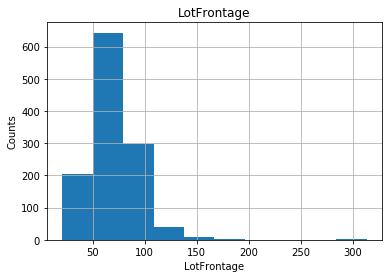

In [50]:
#Will run simple imputation of mode

train['LotFrontage'].hist()
plt.title('LotFrontage');
plt.ylabel('Counts');
plt.xlabel('LotFrontage')
LF_mode=train['LotFrontage'].mode()[0]

train['LotFrontage']=train['LotFrontage'].fillna(LF_mode)
xtest['LotFrontage']=xtest['LotFrontage'].fillna(LF_mode)
# A second Pass could entail looking at lot variables, street variables, to learn regression for lot frontage
#plt.scatter(x='LotArea', y='LotFrontage', data=train);
#axes = plt.axes()
#axes.set_xlim([0, 100000])

In [51]:
cols=['MasVnrArea','MasVnrType']

train[(train['MasVnrArea']<20) & (train['MasVnrArea']>0)][cols]
xtest[(xtest['MasVnrArea']<20) & (xtest['MasVnrArea']>0)][cols]


#Lets assume that the MasVnrArea of 1 is actually meant to be 0

,MasVnrArea,MasVnrType
23,14.0,BrkFace
225,16.0,BrkFace
305,3.0,BrkFace
858,16.0,Stone
861,16.0,BrkFace
866,16.0,BrkFace
992,1.0,None
1211,14.0,BrkFace
1213,18.0,BrkFace
1214,14.0,BrkFace


In [52]:
#Lets assume MassVnrtype is None for the two cases where MasVnrArea=0
train[(train['MasVnrArea']==0) &(train['MasVnrType']!='None')][cols]
xtest[(xtest['MasVnrArea']==0) &(xtest['MasVnrType']!='None')][cols]
train.loc[[688,1241],cols[1]]= 'None'
xtest.loc[[859],cols[1]]= 'None'

#Lets also assume that all NA's are 'None and zero'
train[train[cols].isnull().all(axis=1)][cols]
xtest[xtest[cols].isnull().all(axis=1)][cols]
train[cols[0]].value_counts()

train[cols[0]]=train[cols[0]].fillna(0)
xtest[cols[0]]=xtest[cols[0]].fillna(0)
train[cols[1]]=train[cols[1]].fillna('None')
xtest[cols[1]]=xtest[cols[1]].fillna('None')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [53]:
misval=pd.DataFrame()
misval['misval_test']=xtest.isnull().sum()
misval['misval_test_%']=round(100*pd.DataFrame(xtest.isnull().sum())/(1459),1)

misval['misval_train']=pd.DataFrame(train.isnull().sum())
misval['misval_train_%']=round(100*pd.DataFrame(train.isnull().sum())/(1460),1)

misval['total_misval']=misval['misval_test']+misval['misval_train']
misval['total_misval_%']=round((100*misval['total_misval'])/(1460+1459),1)
misval=misval[misval['total_misval']>0].sort_values(by='total_misval_%',ascending=False)
misval

,misval_test,misval_test_%,misval_train,misval_train_%,total_misval,total_misval_%
MSZoning,4,0.3,0,0.0,4,0.1
Utilities,2,0.1,0,0.0,2,0.1
Functional,2,0.1,0,0.0,2,0.1
Exterior1st,1,0.1,0,0.0,1,0.0
Exterior2nd,1,0.1,0,0.0,1,0.0
Electrical,0,0.0,1,0.1,1,0.0
KitchenQual,1,0.1,0,0.0,1,0.0
SaleType,1,0.1,0,0.0,1,0.0


In [54]:
cols=misval.index.tolist()
for i in range(len(cols)):
    #print(xtest[cols[i]].fillna(xtest[cols[i]].value_counts()[0]))
    xtest[cols[i]]=xtest[cols[i]].fillna(train[cols[i]].value_counts().keys()[0])
    train[cols[i]]=train[cols[i]].fillna(train[cols[i]].value_counts().keys()[0])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [55]:
## NO missing Values!

misval=pd.DataFrame()
misval['misval_test']=xtest.isnull().sum()
misval['misval_test_%']=round(100*pd.DataFrame(xtest.isnull().sum())/(1459),1)

misval['misval_train']=pd.DataFrame(train.isnull().sum())
misval['misval_train_%']=round(100*pd.DataFrame(train.isnull().sum())/(1460),1)

misval['total_misval']=misval['misval_test']+misval['misval_train']
misval['total_misval_%']=round((100*misval['total_misval'])/(1460+1459),1)
misval=misval[misval['total_misval']>0].sort_values(by='total_misval_%',ascending=False)
misval

,misval_test,misval_test_%,misval_train,misval_train_%,total_misval,total_misval_%


## Encoding of Variables

Will have to change categorical values to numerical values. 

After numerical conversion, they will be split into ordinal or one hot encoding.

*One hot encoding will be conducted for linear regression. However, for random forest it reduces accuracy so will leave as numerical values

In [57]:
import re
file=open('./categorical.txt','r')
stringlist=file.read().splitlines()

In [67]:
dictlist=[]
for i in range(len(stringlist)):
    value=[]
    #if there is no spaces in the line entry, add as key
    if re.match('^\S', stringlist[i]):
        key=stringlist[i]
        n=i
        #add all entries that have a space as a value 
        for j in range(len(stringlist[n+1:])):
            if re.match('^\s',stringlist[n+1:][j]):
                value.append(stringlist[n+1:][j].split(maxsplit=1)[0])  
        #break until the next key is observed
            elif re.match('^\S',stringlist[n+1:][j]):
                break       
        dictlist.append({key: value})


In [87]:
dictlist[13]

{'RoofStyle': ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed']}

In [86]:
#dictlist.pop(0,14,13) remove all the numerical values
len(dictlist)

43

In [90]:
for i in range(len(dictlist)):
    [[key, value]] = dictlist[i].items()
    scale_mapper={k: v for v, k in enumerate(value[::-1])}
    print(key)
    print(scale_mapper)
    train[key]=train[key].replace(scale_mapper)
    xtest[key]=xtest[key].replace(scale_mapper)
#train[key]

MSZoning
{'A': 0, 'C': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7}
Street
{'Grvl': 0, 'Pave': 1}
Alley
{'Grvl': 0, 'Pave': 1, 'NA': 2}
LotShape
{'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
LandContour
{'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}
Utilities
{'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}
LotConfig
{'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}
LandSlope
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood
{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'Names': 12, 'NoRidge': 13, 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Condition1
{'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5, 'PosA': 6, 'RRNe': 7, 'RRAe': 8}
Condition2
{'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRNn': 3, 'RRAn': 4, 'PosN': 5, 'PosA': 6, 'R

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


MiscFeature
{'Elev': 0, 'Gar2': 1, 'Othr': 2, 'Shed': 3, 'TenC': 4, 'NA': 5}
SaleType
{'WD': 0, 'CWD': 1, 'VWD': 2, 'New': 3, 'COD': 4, 'Con': 5, 'ConLw': 6, 'ConLI': 7, 'ConLD': 8, 'Oth': 9}
SaleCondition
{'Normal': 0, 'Abnorml': 1, 'AdjLand': 2, 'Alloca': 3, 'Family': 4, 'Partial': 5}


In [180]:
error_cols=train.select_dtypes(exclude=['int64','float']).columns.tolist()
x=error_cols[9]
train[x].unique()

array([2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0,
       1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0,
       1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0,
       1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, 'NA',
       1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0,
       1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0,
       1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0,
       1969.0, 1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0,
       1986.0, 1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0,
       1996.0, 1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0,
       1925.0, 1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0,
       1952.0, 1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0,
       1929.0, 1933.0], dtype=object)

In [176]:

#GarageYrBlt has instances of NA---FIX
#Functional has int values but shows dytpe of object for some reason
#KitchenQual has in values but shows dtype of object for some reason
#ExterQual ""
#Exter2nd(5) has uncoverted instances
#Exter1st has uncoverted instances
#'Bldgtype' ""
#Neighborhood "" 'NAmes'
#MSZoning ""  'C (all)'

#remap the misspelled variable names
scale_mapper= {'Brk Cmn': 2}
    
train[x]=train[x].replace(scale_mapper)
xtest[x]=xtest[x].replace(scale_mapper)
train[x].unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


array([14,  8, 16,  6, 10, 15,  5,  3, 13,  0,  2,  7,  1, 12,  9,  4],
      dtype=int64)

In [181]:
#Test to make sure that that the encoding worked
temp=pd.read_csv("./train.csv")
x='Functional'
temp[x].value_counts(),train[x].value_counts()

(Typ     1360
 Min2      34
 Min1      31
 Mod       15
 Maj1      14
 Maj2       5
 Sev        1
 Name: Functional, dtype: int64, 0    1360
 2      34
 1      31
 3      15
 4      14
 5       5
 6       1
 Name: Functional, dtype: int64)

In [233]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null int64
Alley            1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null object
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null object
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
M

In [238]:
xtest['Condition2'].unique()

array([2, 1, 6, 5, 0], dtype=object)

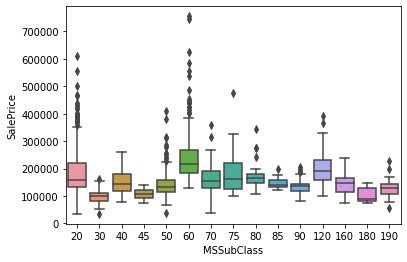

In [92]:
fig = sns.boxplot(y='SalePrice', x="MSSubClass", data=train)
#MSsubclass is not ordinal

In [462]:
#remove ID number

xtrain=train[train.columns[1:80]]

xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,5,65.0,8450,1,2,0,0,0,0,...,0,0,4,4,5,0,0,2008,0,0
1,20,5,80.0,9600,1,2,0,0,0,3,...,0,0,4,4,5,0,1,2007,0,0
2,60,5,68.0,11250,1,2,1,0,0,0,...,0,0,4,4,5,0,3,2008,0,0
3,70,5,60.0,9550,1,2,1,0,0,1,...,0,0,4,4,5,0,0,2006,0,1
4,60,5,84.0,14260,1,2,1,0,0,3,...,0,0,4,4,5,0,0,2008,0,0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0, 0.5, 'SalePrice')

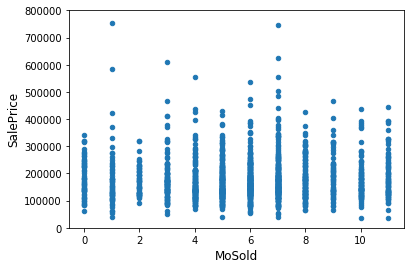

In [454]:
x='MoSold'

#r=pd.read_csv("./train.csv")
#ra=pd.read_csv("./test.csv")
#train[x]=r[x]
#xtest[x]=ra[x]
#xtest[x]

scale_mapper= {12: 0}
    
train[x]=train[x].replace(scale_mapper)
xtest[x]=xtest[x].replace(scale_mapper)


GrLiv_data=train[['SalePrice', x]]
GrLiv_data.plot.scatter(x, y='SalePrice',ylim=(0,800000));
plt.xlabel(x,fontsize=12)
plt.ylabel('SalePrice',fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0, 0.5, 'SalePrice')

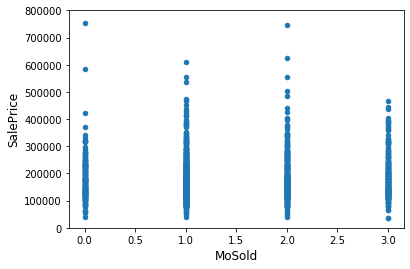

In [455]:
#Bin Months(seasons) 12,1,2  3,4,5 6,7,8 9,10,11

arf=pd.DataFrame()
bins=[-1,2,6,8,11]
arf=pd.cut(train[x],bins,labels=[0,1,2,3]).astype('int64')
train[x]=arf
xtest[x]=pd.cut(xtest[x],bins,labels=[0,1,2,3]).astype('int64')

x='MoSold'
data=train[['SalePrice', x]]
data.plot.scatter(x, y='SalePrice',ylim=(0,800000));
plt.xlabel(x,fontsize=12)
plt.ylabel('SalePrice',fontsize=12)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0, 0.5, 'SalePrice')

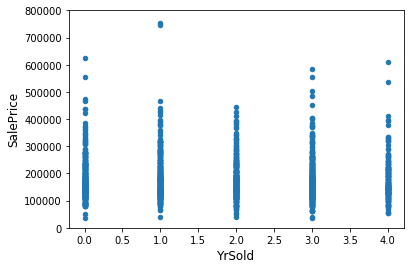

In [467]:
#Replace yr sold with num values 2006: 0,2007:1,2008:2,2009:3, 2010:4
# will need to one hot encode for regression
x='YrSold'


r=pd.read_csv("./train.csv")
ra=pd.read_csv("./test.csv")
train[x]=r[x]
xtest[x]=ra[x]
xtest[x]

scale_mapper= {2006: 0,2007:1,2008:2,2009:3, 2010:4}
    
train[x]=train[x].replace(scale_mapper)
xtest[x]=xtest[x].replace(scale_mapper)

GrLiv_data=train[['SalePrice', x]]
GrLiv_data.plot.scatter(x, y='SalePrice',ylim=(0,800000));
plt.xlabel(x,fontsize=12)
plt.ylabel('SalePrice',fontsize=12)

Text(0, 0.5, 'SalePrice')

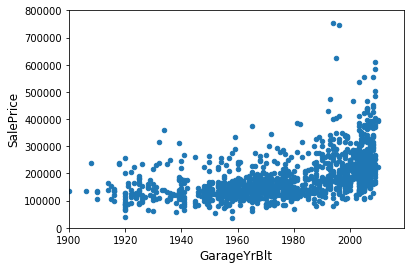

In [543]:
x="GarageYrBlt"
train[x].unique()

scale_mapper= {'NA': 0}
temp=pd.DataFrame()    
temp['GarageYrBlt']=train[x].replace(scale_mapper)
temp['SalePrice']=train['SalePrice']
data=temp[['SalePrice', x]]
data.plot.scatter(x, y='SalePrice',ylim=(0,800000),xlim=(1900,2019));
plt.xlabel(x,fontsize=12)
plt.ylabel('SalePrice',fontsize=12)

In [632]:
#Change rest of the objects into int64, Now everything is numerically encoded

x=['Utilities','ExterQual','KitchenQual','Functional','Condition2','Electrical','Fence','PoolQC']

train[x]=train[x].astype('int64')
xtest[x]=xtest[x].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Standard scaling of columns that contain continuous variables

In [10]:
cat=pd.read_csv("./categorical.csv")
catcols=cat['categories'].unique().tolist()
hotcols=cat[cat['encode']=='hot']['categories'].tolist()
nomcols=cat[cat['encode']=='nom']['categories'].tolist()
intcols = [col for col in xtrain.columns if col not in catcols]


In [ ]:
from sklearn.preprocessing import StandardScaler

scl=scaler.fit(xtrain[intcols])
ttrain=scaler.transform(xtrain[intcols])
ttest=scaler.transform(xtest[intcols])
xtest[intcols]=pd.DataFrame(ttest, columns=intcols)
xtrain[intcols]=pd.DataFrame(ttrain, columns=intcols)

In [ ]:
#xtrain.to_csv('xtrain_sscale.csv',index=False)
#xtest.to_csv('xtest_sscale.csv',index=False)

In [75]:
xtest=pd.read_csv('xtest_sscale.csv')
xtrain=pd.read_csv('xtrain_sscale.csv')

## Machine learning: RandomForest

Step1) Ran 5 folds on random forest and ran feature importance to find important features

Step2) Ran Gridsearch on hyperparameters to find optimal hyperparameters

Step3) Rerun 5folds with optimal hyperparameters and train whole dataset to predict the test set

In [44]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=5)
cvscores=[]
trscores=[]
yltrain=np.log(ytrain)
for train_index, test_index in kf.split(xtrain):
    X_train, X_test = xtrain[topcols].iloc[train_index], xtrain[topcols].iloc[test_index]
    y_train, y_test = yltrain.iloc[train_index], yltrain.iloc[test_index]
    regr = RandomForestRegressor(max_depth=60, max_features= 5,min_samples_split=2, min_samples_leaf=3, random_state=0, n_estimators=300)
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)
    y_predtr=regr.predict(X_train)
    
    cvscores.append(np.sqrt(mean_squared_error((y_test), (y_pred))))
    
    trscores.append(np.sqrt(mean_squared_error((y_train), (y_predtr))))
    
"""
    print('For cross validation set')
    print('Root mean squared error: %.2f'
          % np.sqrt(mean_squared_error((y_test), (y_pred))))
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))
    
    print('For Training set')
    print('Root mean squared error: %.2f'
          % np.sqrt(mean_squared_error((y_train), (y_predtr))))
    
    print('Coefficient of determination: %.2f'
          % r2_score(y_train, y_predtr)) 
          """

"\n    print('For cross validation set')\n    print('Root mean squared error: %.2f'\n          % np.sqrt(mean_squared_error((y_test), (y_pred))))\n    print('Coefficient of determination: %.2f'\n          % r2_score(y_test, y_pred))\n    \n    print('For Training set')\n    print('Root mean squared error: %.2f'\n          % np.sqrt(mean_squared_error((y_train), (y_predtr))))\n    \n    print('Coefficient of determination: %.2f'\n          % r2_score(y_train, y_predtr)) \n          "

In [46]:
np.mean(cvscores)

0.14617890340462053

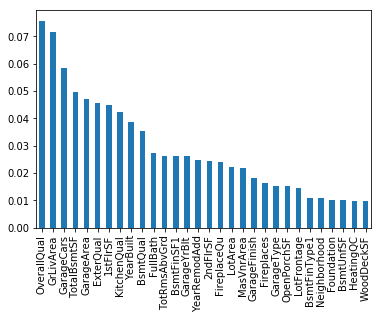

In [37]:
feat_importances = pd.Series(regr.feature_importances_, index=xtrain.columns)
feat_importances.nlargest(30).plot(kind='bar')
topcols=feat_importances.nlargest(30).index

In [38]:
from sklearn.model_selection import GridSearchCV
yltrain=(np.log(ytrain))
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 60],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2,3,8],
    'n_estimators': [100, 200, 300]
}

# Create a based model
rf = RandomForestRegressor(criterion='mse')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
                           
grid_search.fit(xtrain[topcols], yltrain)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  3.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, 60], 'max_features': [2, 3, 5], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [2, 3, 8], 'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [40]:
grid_search.best_params_,grid_search.best_score_


({'bootstrap': True,
  'max_depth': 60,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.8686064205849338)

In [49]:
x

array([     0, 700000])

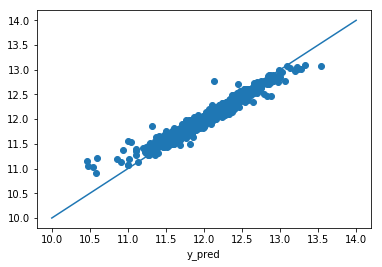

In [55]:
x=np.array([10,14])
y=x
plt.scatter((y_train),(y_predtr))
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.plot(x,y)

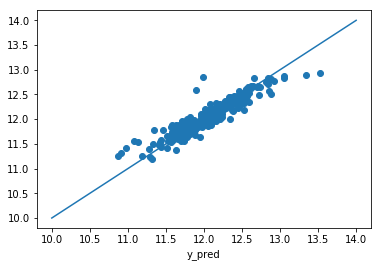

In [56]:
plt.scatter((y_test),(y_pred))
plt.xlabel('y_test')
plt.xlabel('y_pred')

plt.plot(x,y)

In [69]:
regr = RandomForestRegressor(max_depth=60, max_features= 5,min_samples_split=2, min_samples_leaf=3, random_state=0, n_estimators=300)
regr.fit(xtrain[topcols], np.log(ytrain))
ypred=regr.predict(xtest[topcols])



In [70]:
ans=pd.DataFrame()
ans['Id']=test['Id']
ans['SalePrice']=np.exp(y_pred)
ans.to_csv('data_1.csv',index=False)

## Machine Learning: Ridge Regression
Step1: One hot encode

Step2: Run ridge regression (gridsearch) to find optimal alpha

Step3: use optimal alpha and use to predict

In [77]:
#Linear Regression---> combine test and train set
#one hot encode as a composite(hotcomp)
#combine new columns from one hot encoding with old columns
#remove the original columns that were one hot encoded

comp=pd.concat([xtrain[hotcols],xtest[hotcols]]).astype(str)
hotcomp=pd.get_dummies(comp)

xtrain_hot=hotcomp.iloc[:1460]
xtest_hot=hotcomp.iloc[1460:]

temptrain=pd.concat([xtrain,xtrain_hot],axis=1)
temptest=pd.concat([xtest,xtest_hot],axis=1)

temptrain=temptrain.drop(hotcols,axis=1)
temptest=temptest.drop(hotcols,axis=1)

xtrain=temptrain
xtest=temptest

KeyError: "None of [Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',\n       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\n       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',\n       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',\n       'MiscFeature', 'SaleType', 'SaleCondition', 'YrSold', 'MoSold'],\n      dtype='object')] are in the [columns]"

In [3]:
#xtrain.to_csv('xtrain_sscale_hot.csv',index=False)
#xtest.to_csv('xtest_sscale_hot.csv',index=False)

In [81]:
xtrain=pd.read_csv('xtrain_sscale_hot.csv')
xtest=pd.read_csv('xtest_sscale_hot.csv')

In [117]:
topcols[:25]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea',
       'ExterQual', '1stFlrSF', 'KitchenQual', 'YearBuilt', 'BsmtQual',
       'FullBath', 'TotRmsAbvGrd', 'BsmtFinSF1', 'GarageYrBlt', 'YearRemodAdd',
       '2ndFlrSF', 'FireplaceQu', 'LotArea', 'MasVnrArea', 'GarageFinish',
       'Fireplaces', 'GarageType', 'OpenPorchSF', 'LotFrontage',
       'BsmtFinType1'],
      dtype='object')

In [126]:
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5)
cvscores=[]
trscores=[]
yltrain=(np.log(ytrain))
for train_index, test_index in kf.split(xtrain):
    X_train, X_test = xtrain.iloc[train_index], xtrain.iloc[test_index]
    y_train, y_test = yltrain.iloc[train_index], yltrain.iloc[test_index]
    rid = Ridge(alpha=10)
    rid.fit(X_train, y_train)
    y_pred=rid.predict(X_test)
    y_predtr=rid.predict(X_train)
    
    cvscores.append(np.sqrt(mean_squared_error((y_test), (y_pred))))
    
    trscores.append(np.sqrt(mean_squared_error((y_train), (y_predtr))))
    
np.mean(cvscores)

0.13871911688799834

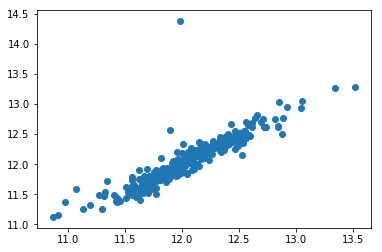

In [106]:
plt.scatter(y_test,y_pred)

In [128]:
rid.fit(xtrain,np.log(ytrain))
ypredtr=rid.predict(xtrain)
ypred=rid.predict(xtest)



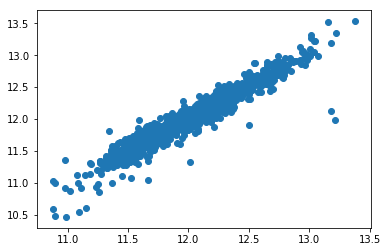

In [129]:
plt.scatter(ypredtr,np.log(ytrain))

In [131]:
ans

,Id,SalePrice
0,1461,109775.960958
1,1462,147595.260056
2,1463,166698.695846
3,1464,189561.394463
4,1465,188858.585576
5,1466,165281.707774
6,1467,174195.902032
7,1468,160952.303727
8,1469,181833.751165
9,1470,119335.169547


In [130]:
#Score ended up being mlse of 0.1335
ans=pd.DataFrame()
ans['Id']=test['Id']
ans['SalePrice']=np.exp(ypred)
ans.to_csv('data_ridge.csv',index=False)